In [1]:
#%matplotlib notebook
#%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
matplotlib.rcParams['figure.figsize'] = [8,6]
matplotlib.rcParams.update({'font.size': 16})
pngdpi=150

In [4]:
top_100_above_1000 = pd.read_csv('Halos/merged/top_100_merged_above_1000.csv')

In [5]:
top_100_above_1000.dtypes

Unnamed: 0                             int64
Unnamed: 0_orig                        int64
Unnamed: 0_comp                        int64
mag_diff_orig                        float64
mag_diff_comp                        float64
fof_halo_count_orig                    int64
fof_halo_count_comp                    int64
fof_halo_tag_orig                      int64
fof_halo_tag_comp                      int64
fof_halo_mass_orig                   float64
fof_halo_mass_comp                   float64
fof_halo_ke_orig                     float64
fof_halo_ke_comp                     float64
fof_halo_center_x_orig               float64
fof_halo_center_x_comp               float64
fof_halo_center_y_orig               float64
fof_halo_center_y_comp               float64
fof_halo_center_z_orig               float64
fof_halo_center_z_comp               float64
fof_halo_angmom_x_orig               float64
fof_halo_angmom_x_comp               float64
fof_halo_angmom_y_orig               float64
fof_halo_a

In [6]:
haloID = 944404240

In [7]:
halo = top_100_above_1000[top_100_above_1000['fof_halo_tag_orig']==haloID]

In [8]:
halo

,Unnamed: 0,Unnamed: 0_orig,Unnamed: 0_comp,mag_diff_orig,mag_diff_comp,fof_halo_count_orig,fof_halo_count_comp,fof_halo_tag_orig,fof_halo_tag_comp,fof_halo_mass_orig,...,fof_halo_angmom_dx_orig,fof_halo_angmom_dx_comp,fof_halo_angmom_dy_orig,fof_halo_angmom_dy_comp,fof_halo_angmom_dz_orig,fof_halo_angmom_dz_comp,fof_halo_angmom_mag_orig,fof_halo_angmom_mag_comp,fof_halo_specific_angmom_mag_orig,fof_halo_specific_angmom_mag_comp
2,2,2,2,0.494269,0.494269,13913,13913,944404240,944404240,7.633143e+12,...,0.926759,0.934126,-0.043094,0.236213,0.373176,0.267604,3.386228e+12,4.577252e+12,0.443622,0.599655


In [9]:
mpp = float(halo['fof_halo_mass_orig']/halo['fof_halo_count_orig'])
print('%e'%mpp)

5.486339e+08


In [10]:
orig = pd.read_csv('HaloParticles/big/944404240_orig.csv')
comp = pd.read_csv('HaloParticles/big/944404240_PosNoComp_vel_.01.csv')

In [11]:
orig.dtypes

x               float64
y               float64
z               float64
vx              float64
vy              float64
vz              float64
id              float64
fof_halo_tag    float64
dtype: object

In [12]:
(np.abs(orig['id'] - comp['id'])).sum()

0.0

In [13]:
def mean(arr):
    return arr.sum(0)/arr.shape[0]

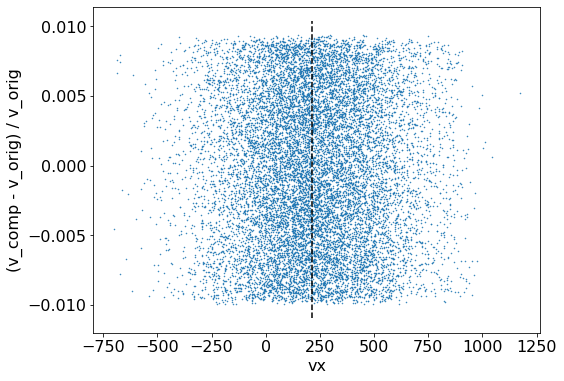

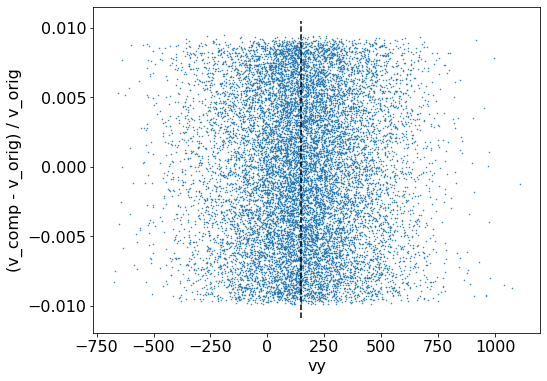

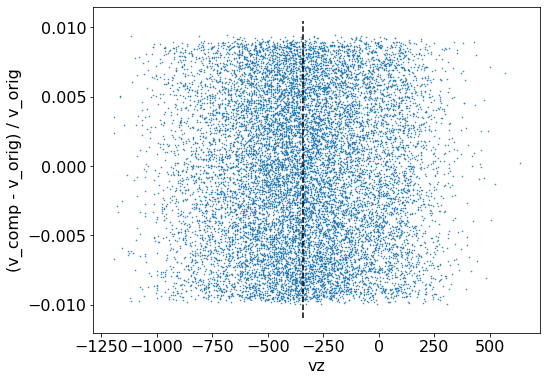

In [14]:
for v in ['vx','vy','vz']:
    vo = orig[v]
    vc = comp[v]
    plt.plot(vo,(vc - vo)/vo,'.',markersize=1)
    ax = plt.gca().axis()
    m = mean(vo)
    plt.plot([m,m],[ax[2],ax[3]],'--k')
    plt.xlabel(v)
    plt.ylabel('(v_comp - v_orig) / v_orig')
    plt.show()

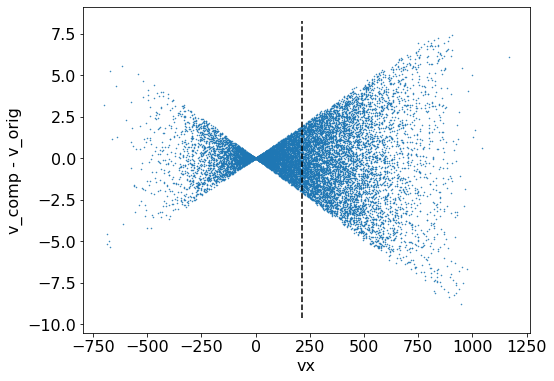

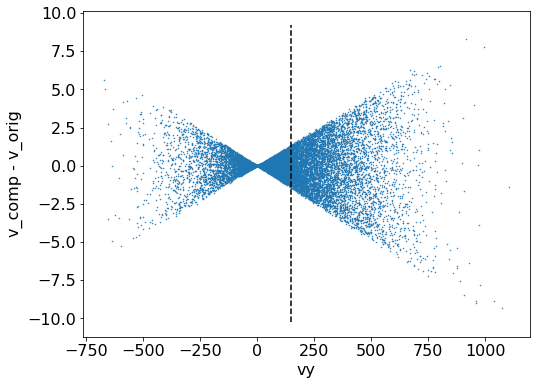

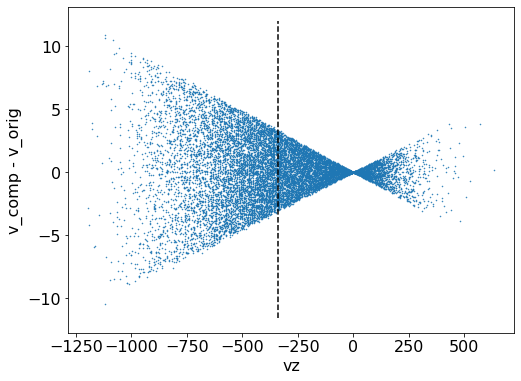

In [15]:
for v in ['vx','vy','vz']:
    vo = orig[v]
    vc = comp[v]
    plt.plot(vo,vc - vo,'.',markersize=1)
    ax = plt.gca().axis()
    m = mean(vo)
    plt.plot([m,m],[ax[2],ax[3]],'--k')
    plt.xlabel(v)
    plt.ylabel('v_comp - v_orig')
    plt.show()

In [16]:
def df_vector(df, pattern):
    vec = []
    for d in ['x','y','z']:
        vec.append(df[pattern%d])
    return np.array(vec).flatten()

def df_vectorArr(df,pattern):
    vecArr = []
    for d in ['x','y','z']:
        vecArr.append(df[pattern%d].to_numpy())
    return np.array(vecArr).transpose()

def df_posArr(df):
    return df_vectorArr(df,'%s')

def df_velArr(df):
    return df_vectorArr(df,'v%s')

In [17]:
print('Center of Mass (Mpc/h)')
halo_orig = df_vector(halo,'fof_halo_com_%s_orig')
halo_comp = df_vector(halo,'fof_halo_com_%s_comp')
part_orig = mean(df_posArr(orig))
part_comp = mean(df_posArr(comp))
print('orig halo ' + str(halo_orig))
print('orig part ' + str(part_orig))
print('orig err ' + str(part_orig/halo_orig - 1.0))
print('comp halo ' + str(halo_comp))
print('comp part ' + str(part_comp))
print('comp err  ' + str(part_comp/halo_comp - 1.0))

Center of Mass (Mpc/h)
orig halo [231.59295654 171.4563446  187.02827454]
orig part [231.59295396 171.45634135 187.02826869]
orig err [-1.11617816e-08 -1.89593709e-08 -3.12667080e-08]
comp halo [231.59295654 171.4563446  187.02827454]
comp part [231.59295396 171.45634135 187.02826869]
comp err  [-1.11617816e-08 -1.89593709e-08 -3.12667080e-08]


In [18]:
print('Mean Velocity (km/s)')
halo_orig = df_vector(halo,'fof_halo_mean_v%s_orig')
halo_comp = df_vector(halo,'fof_halo_mean_v%s_comp')
part_orig = mean(df_velArr(orig))
part_comp = mean(df_velArr(comp))
print('orig halo ' + str(halo_orig))
print('orig part ' + str(part_orig))
print('orig err ' + str(part_orig/halo_orig - 1.0))
print('comp halo ' + str(halo_comp))
print('comp part ' + str(part_comp))
print('comp err  ' + str(part_comp/halo_comp - 1.0))

Mean Velocity (km/s)
orig halo [ 215.83309937  147.78263855 -341.15332031]
orig part [ 215.83310444  147.78263651 -341.15332007]
orig err [ 2.35309490e-08 -1.38280535e-08 -7.22886417e-10]
comp halo [ 215.76119995  147.7334137  -341.02713013]
comp part [ 215.7612074   147.73341546 -341.02713941]
comp err  [3.45146189e-08 1.19675119e-08 2.72080276e-08]


In [19]:
np.cross(np.array([[1,0,0],[0,1,0]]),np.array([[0,1,0],[0,0,1]]))

array([[0, 0, 1],
       [1, 0, 0]])

In [20]:
print(df_vector(halo,'fof_halo_angmom_%s_orig'))
print(df_vector(halo,'fof_halo_angmom_%s_comp'))

[ 3.13821836e+12 -1.45925865e+11  1.26365807e+12]
[4.27573064e+12 1.08120710e+12 1.22489143e+12]


In [21]:
# assumes same mass for all particles
def angmom(posArr, posCenter, velArr, velCenter, mass_per_particle):
    return (np.cross(posArr - posCenter, velArr - velCenter)).sum(0)*mass_per_particle

Try center-of-mass and mean velocity, does not show sensitivity to velocity compression residuals, also does not agree with HACC/CosmoTools outputs for FOF angular momentum.

In [23]:
pdf = orig
posArr = df_posArr(pdf)
velArr = df_velArr(pdf)
angmom(posArr, mean(posArr), velArr, mean(velArr), mpp)

array([4.38365264e+13, 4.70850806e+13, 1.25976123e+13])

In [24]:
pdf = comp
posArr = df_posArr(pdf)
velArr = df_velArr(pdf)
angmom(posArr, mean(posArr), velArr, mean(velArr), mpp)

array([4.38384858e+13, 4.71223436e+13, 1.25872293e+13])

The version of HACC/CosmoTools used for this test still used the halo center particle position and velocity as the position and velocity of the halo.

In [47]:
halo_com = df_vector(halo, 'fof_halo_com_%s_orig')
halo_center = df_vector(halo, 'fof_halo_center_%s_orig')
print('center         ' + str(halo_center))
print('center of mass ' + str(halo_com))
print('mean position  ' + str(mean(df_posArr(orig))))

center         [231.56425476 171.48348999 187.01818848]
center of mass [231.59295654 171.4563446  187.02827454]
mean position  [231.59295396 171.45634135 187.02826869]


Following Tricia Larsen's suggestion we can use the halo position to identify the center particle.

In [28]:
center = df_vector(halo, 'fof_halo_center_%s_orig')
posArr = df_posArr(orig)
err = ((posArr - center)**2).sum(1)
center_selector = (err==0.0)

And now we can see how much the center/halo velocity changed due to the compression residuals.

In [29]:
orig[center_selector]

,x,y,z,vx,vy,vz,id,fof_halo_tag
6640,231.564255,171.48349,187.018188,199.129333,215.321777,-562.622925,965377794.0,944404240.0


In [30]:
comp[center_selector]

,x,y,z,vx,vy,vz,id,fof_halo_tag
6640,231.564255,171.48349,187.018188,198.216141,216.197968,-557.360657,965377794.0,944404240.0


In [40]:
halo_vel_orig = df_velArr(orig)[center_selector]
halo_vel_orig

array([[ 199.1293335 ,  215.32177734, -562.6229248 ]])

In [41]:
halo_vel_comp = df_velArr(comp)[center_selector]
halo_vel_comp

array([[ 198.21614075,  216.19796753, -557.36065674]])

Print the HACC/CosmoTools halo angular momenta again for reference.

In [33]:
print(df_vector(halo,'fof_halo_angmom_%s_orig'))
print(df_vector(halo,'fof_halo_angmom_%s_comp'))

[ 3.13821836e+12 -1.45925865e+11  1.26365807e+12]
[4.27573064e+12 1.08120710e+12 1.22489143e+12]


Now we can reproduce the result for the uncompressed velocities.

In [34]:
pdf = orig
posArr = df_posArr(pdf)
velArr = df_velArr(pdf)
angmom(posArr, halo_center, velArr, halo_vel_orig, mpp)

array([ 3.13821863e+12, -1.45925822e+11,  1.26365801e+12])

And for the decompressed velocities.

In [35]:
pdf = comp
posArr = df_posArr(pdf)
velArr = df_velArr(pdf)
angmom(posArr, halo_center, velArr, halo_vel_comp, mpp)

array([4.27573106e+12, 1.08120695e+12, 1.22489089e+12])

Adrian's theory is that the halo angular momentum bias that is sensitive to the velocity compression residuals is coming mainly from the difference between the halo velocity before and after compression. First test is to use the compressed velocities for all of the particles, but use the uncompressed halo velocity, and the result is much closer to the result before velocity compression.

In [36]:
pdf = comp
posArr = df_posArr(pdf)
velArr = df_velArr(pdf)
angmom(posArr, halo_center, velArr, halo_vel_orig, mpp)

array([ 3.11781695e+12, -1.41836642e+11,  1.22759315e+12])

FOF halo angular momentum when all particles have the same mass $m_p$:

$ \vec{L} = m_p \sum_i (\vec{r}_i - \vec{r}_{center}) \times (\vec{v}_i - \vec{v}_{center}) $

Velocity compression residuals:

$ \vec{v}_i \rightarrow \vec{v}_i + \vec{\epsilon}_i $

$ \vec{v}_{center} \rightarrow \vec{v}_{center} + \vec{\epsilon}_{center} $

Angular momentum with velocity compression residuals:

$ \vec{L}' = m_p \sum_i (\vec{r}_i - \vec{r}_{center}) \times [(\vec{v}_i + \vec{\epsilon}_i) - (\vec{v}_{center} + \vec{\epsilon}_{center})] $

According to Adrian's error estimates, the angular momentum should be much less sensitive to halo velocity when using the center of mass as the point around which to measure angular momentum.

In [48]:
pdf = orig
posArr = df_posArr(pdf)
velArr = df_velArr(pdf)
angmom(posArr, halo_com, velArr, halo_vel_orig, mpp)

array([4.38280163e+13, 4.70887050e+13, 1.25993595e+13])

In [49]:
pdf = comp
posArr = df_posArr(pdf)
velArr = df_velArr(pdf)
angmom(posArr, halo_com, velArr, halo_vel_orig, mpp)

array([4.38299704e+13, 4.71259736e+13, 1.25889756e+13])

In [50]:
pdf = comp
posArr = df_posArr(pdf)
velArr = df_velArr(pdf)
angmom(posArr, halo_com, velArr, halo_vel_comp, mpp)

array([4.38300619e+13, 4.71258290e+13, 1.25890155e+13])

Actually, according to Adrian's error estimates, the angular momentum should be completely insensitive to the halo velocity when measuring around the center of mass, at least for the case of all particles with the same mass, and we do get pretty close to the same result when putting in a very different halo velocity, like (0,0,0), even when we're still using the center of mass quantity from the halo file.

In [51]:
pdf = comp
posArr = df_posArr(pdf)
velArr = df_velArr(pdf)
angmom(posArr, halo_com, velArr, np.array([0,0,0]), mpp)

array([4.38535421e+13, 4.71059837e+13, 1.25896680e+13])

But we can do even better if using the mean particle position calculated directly from the list of particles, which is very slightly different from the quantity in the halo file. Recalculate the angular momentum using the uncompressed velocities.

In [54]:
pdf = orig
posArr = df_posArr(pdf)
velArr = df_velArr(pdf)
angmom(posArr, mean(posArr), velArr, halo_vel_orig, mpp)

array([4.38365264e+13, 4.70850806e+13, 1.25976123e+13])

And now we'll compare to the decompressed velocities, and we can explicitly show that the value we choose for the halo velocity makes no difference in the output.

In [55]:
pdf = comp
posArr = df_posArr(pdf)
velArr = df_velArr(pdf)
angmom(posArr, mean(posArr), velArr, halo_vel_orig, mpp)

array([4.38384858e+13, 4.71223436e+13, 1.25872293e+13])

In [56]:
pdf = comp
posArr = df_posArr(pdf)
velArr = df_velArr(pdf)
angmom(posArr, mean(posArr), velArr, halo_vel_comp, mpp)

array([4.38384858e+13, 4.71223436e+13, 1.25872293e+13])

In [58]:
pdf = comp
posArr = df_posArr(pdf)
velArr = df_velArr(pdf)
angmom(posArr, mean(posArr), velArr, mean(velArr), mpp)

array([4.38384858e+13, 4.71223436e+13, 1.25872293e+13])

In [57]:
pdf = comp
posArr = df_posArr(pdf)
velArr = df_velArr(pdf)
angmom(posArr, mean(posArr), velArr, np.array([0,0,0]), mpp)

array([4.38384858e+13, 4.71223436e+13, 1.25872293e+13])